This file provides a demonstration of how CSAT and GPM coincidences are found and how data is interpolated. This demo will show how to retrieve a single coincidence from April 26, 2015 at approximately 6am UTC.

Run the following code block if any of the required packages have not yet been installed.

In [ ]:
%pip install numpy
%pip install shapely
%pip install netCDF4
%pip install matplotlib
%pip install sklearn
%pip install haversine
%pip install pyorbital
%pip install cartopy
%pip install haversine
%pip install pyhdf

Below is the user input block found at the beginning of the CSATGPM_coincidences file. This is where all info should be entered before running the program.

For the purposes of this demo, one of the three required files has been provided; the other two are too large to put into github. Please download the file 2A.GPM.DPR.V9-20211125.20150426-S053741-E071011.006575.V07A.HDF5 from https://storm.pps.eosdis.nasa.gov/storm/ and the file 2015116052049_47841_CS_2B-GEOPROF_GRANULE_P1_R05_E06_F00.hdf from https://www.cloudsat.cira.colostate.edu/order/. Indicate the path to each of the downloaded files in the block below before running the program.

In [1]:
# Provide desired time range for coincidences
# to get coincidences for all months of provided year, leave months as empty list
# to get coincidences for all days of provided months, leave days as None
YEARS = [2015]
MONTHS = [4]
DAYS = 26

# If coincidence list for desired time range is already stored in file, set to False and provide filepath
NEED_COINCIDENCES = True
COINCIDENCE_FILEPATH = None

# Provide paths to downloaded files
GMI_PATH = r'demo/GMIfiles'
DPR_PATH = r'demo/DPRfiles'
CS_PATH = r'demo/CSfiles'

# Provide filepath to save CSATGPM files
CSATGPM_PATH = ''


CS_TLEfile = r"TLEs\CloudSat_All_TLEs.txt"
GPM_TLEfile = r"TLEs\GPM_TLEs.txt"
PYORBITAL_CONFIG_PATH = r'\path\platforms'


First, need to track locations of satellites over given time period and find crossings. This uses TLE files (provided in GitHub or available online at https://celestrak.org/NORAD/archives/request.php) and the python pyorbital package.

In [2]:
from CSATGPM import getCoincidences

coincidenceList = getCoincidences(YEARS, MONTHS, DAYS, GPM_TLEfile, CS_TLEfile, PYORBITAL_CONFIG_PATH)

coincidence
[20.63828453442364, -0.361748668524439, datetime.datetime(2015, 4, 26, 0, 37, 4), 6569]
coincidence
[-171.52614638010763, -0.8062455381809549, datetime.datetime(2015, 4, 26, 1, 23), 6569]
coincidence
[-3.622626847546711, 1.7997304615685499, datetime.datetime(2015, 4, 26, 2, 8, 59), 6570]
coincidence
[-27.88552407361738, 3.959813139714991, datetime.datetime(2015, 4, 26, 3, 40, 54), 6571]
coincidence
[139.97174848817275, -5.064250004390222, datetime.datetime(2015, 4, 26, 4, 26, 51), 6571]
coincidence
[115.70273092420464, -7.2117718516032365, datetime.datetime(2015, 4, 26, 5, 58, 47), 6572]
coincidence
[-76.42031630854827, 8.25110440286632, datetime.datetime(2015, 4, 26, 6, 44, 45), 6573]


Coincidences from the day are now stored in the variable coincidenceList. For demo purposes, only one of these coincidences will be accessed. Each coincidence contains the latitude, longitude, and time for both CSAT and GPM during the crossing. Lat and Lon are nearly identical, and time can vary by up to 15 minutes, as a spatial crossing within +- 15 minutes is considered a coincidence (this can be changed in the function getCoincidences if desired).

In [3]:
coincidence = coincidenceList[5]
print(coincidence)

[115.73813199918341, -7.2311631014536575, 47841, datetime.datetime(2015, 4, 26, 6, 8, 21), 115.70273092420464, -7.2117718516032365, 6572, datetime.datetime(2015, 4, 26, 5, 58, 47), datetime.timedelta(seconds=574)]


From the coincidence, the times of interest for Cloudsat and GPM can be extracted and used to find the files that cover those times.

In [4]:

GPMtime = coincidence[7]

CStime = coincidence[3]

from CSATGPM import findFiles
[GMIfile, DPRfile, CSfile] = findFiles(GPMtime, CStime, GMI_PATH, DPR_PATH,CS_PATH)

print(GMIfile)



['1C.GPM.GMI.XCAL2016-C.20150426-S053741-E071011.006575.V07A.HDF5']


These files are then passed to the map() function to interpolate and visualize data.

read gmi
read DPR
read CSAT
plotting


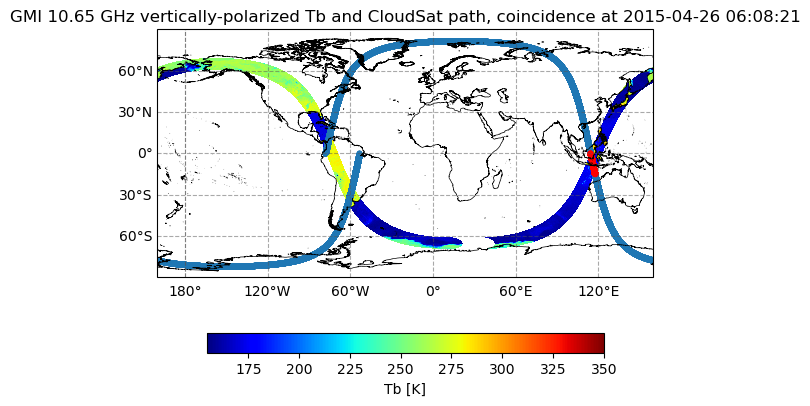

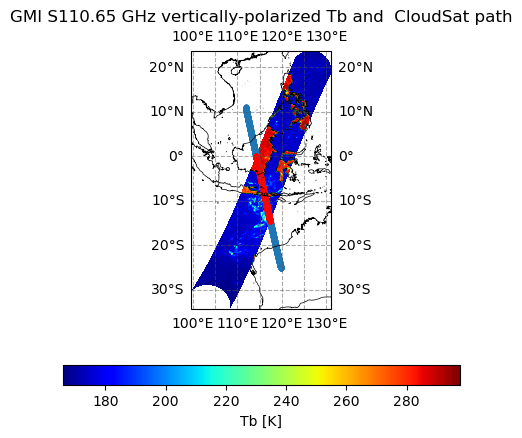

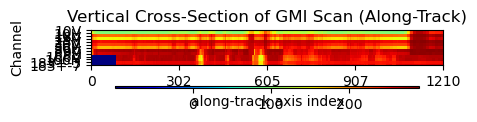

(array([[216.1000061 , 171.03999329, 255.69000244, ..., -99.        ,
         -99.        , -99.        ],
        [216.1000061 , 171.03999329, 255.69000244, ..., -99.        ,
         -99.        , -99.        ],
        [200.47999573, 143.57000732, 237.        , ..., -99.        ,
         -99.        , -99.        ],
        ...,
        [289.52999878, 288.36999512, 288.95999146, ..., -99.        ,
         -99.        , -99.        ],
        [287.95001221, 287.52999878, 288.54000854, ..., -99.        ,
         -99.        , -99.        ],
        [287.95001221, 287.52999878, 288.54000854, ..., -99.        ,
         -99.        , -99.        ]]),
 array([[-99., -99., -99., -99.],
        [-99., -99., -99., -99.],
        [-99., -99., -99., -99.],
        ...,
        [-99., -99., -99., -99.],
        [-99., -99., -99., -99.],
        [-99., -99., -99., -99.]]),
 87,
 1426,
 masked_array(
   data=[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],

In [5]:
ch= 1



from CSATGPM import map
map(GPMtime, CStime, GMIfile, CSfile, DPRfile, True, ch, GMI_PATH, DPR_PATH, CS_PATH)